# Loading the Dataset

In [19]:
import pandas as pd
df = pd.read_csv('data.csv')
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


# Applying correlation to check the relation 

In [52]:
corre = df['price'].corr(df['sqft_living'])
print(corre)

0.43041002543262796


# Preparing the data for regression analysis

In [25]:
print("Mean: ")
print(df.mean())
print("Median: ")
print(df.median())
print("Standard Deviaton: ")
print(df.std())

Mean: 
price            551962.988473
bedrooms              3.400870
bathrooms             2.160815
sqft_living        2139.346957
sqft_lot          14852.516087
floors                1.512065
waterfront            0.007174
view                  0.240652
condition             3.451739
sqft_above         1827.265435
sqft_basement       312.081522
yr_built           1970.786304
yr_renovated        808.608261
dtype: float64
Median: 
price            460943.461539
bedrooms              3.000000
bathrooms             2.250000
sqft_living        1980.000000
sqft_lot           7683.000000
floors                1.500000
waterfront            0.000000
view                  0.000000
condition             3.000000
sqft_above         1590.000000
sqft_basement         0.000000
yr_built           1976.000000
yr_renovated          0.000000
dtype: float64
Standard Deviaton: 
price            563834.702547
bedrooms              0.908848
bathrooms             0.783781
sqft_living         963.206916
sqft

C:\Users\user\AppData\Local\Temp\ipykernel_18120\1841740478.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
C:\Users\user\AppData\Local\Temp\ipykernel_18120\1841740478.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())
C:\Users\user\AppData\Local\Temp\ipykernel_18120\1841740478.py:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid col

# Creating a scatter plot to visalize relation between house price and no sq in fts and bedrooms etc

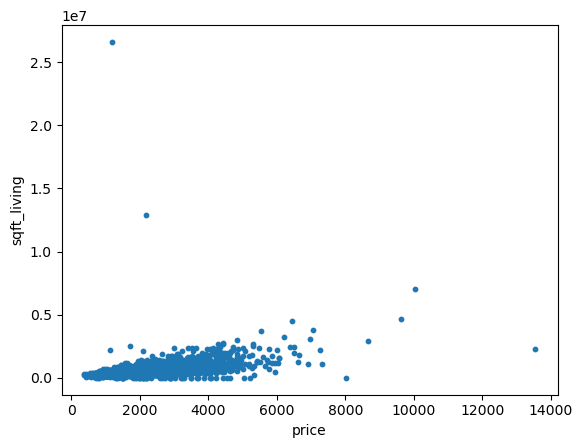

In [55]:
import matplotlib.pyplot as plt
x = df["price"]
y = df["sqft_living"]
plt.scatter(y,x ,s = 10)
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
print(x.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

(4600, 1)


In [57]:
result = LinearRegression()
result.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = result.predict(X_test)

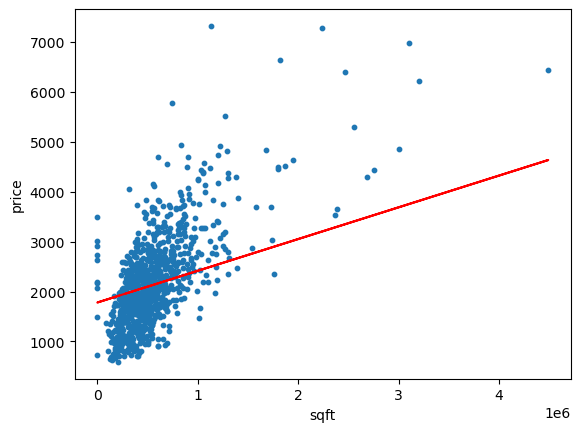

In [65]:
plt.scatter(X_test,y_test, s = 10)
plt.xlabel("sqft")
plt.ylabel("price")
plt.plot(X_test,y_pred, color = "r")
plt.show()

In [67]:
from sklearn.metrics import r2_score
print("R-squared score:", r2_score(y_test, y_pred))

R-squared score: 0.28331330572610036
